##  Import the module

In [1]:
from numpyworld import World

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## Draw colorful lines 1

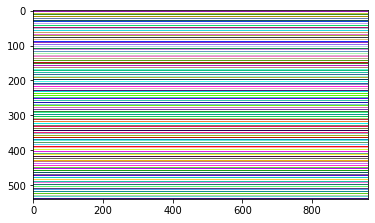

In [4]:
world = World()
world.enable_jupyter_notebook_mode()
#world.disable_jupyter_notebook_mode()

width = 1920 // 2
height = 1080 // 2
world.create_an_image(width=width, height=height)

for y in range(height):
    if y % 2 == 0:
        color = world.get_random_color()
        for x in range(width):
            world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw colorful lines 2

[54, 108, 162, 216, 270, 324, 378, 432, 486, 540]


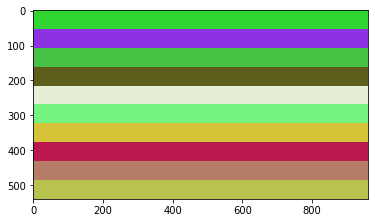

In [6]:
world = World()
world.enable_jupyter_notebook_mode()

width = 1920 // 2
height = 1080 // 2
world.create_an_image(width=width, height=height)

parts_number = 10
part_length = height // parts_number
parts = [(part_index+1)*part_length for part_index in range(parts_number)]
print(parts)

color = world.get_random_color()
for y in range(height):
    if (y in parts):
        color = world.get_random_color()
    for x in range(width):
        world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw colorful box

[0, 90, 180, 270, 360, 450, 540]
[0, 96, 192, 288, 384, 480, 576, 672, 768, 864, 960]


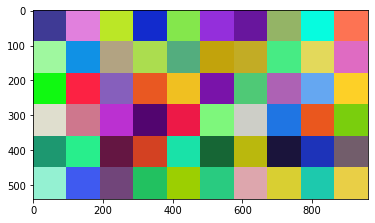

In [8]:
world = World()
world.enable_jupyter_notebook_mode()

width = 1920 // 2
height = 1080 // 2
world.create_an_image(width=width, height=height)

y_parts_number = 6 
y_part_length = height // y_parts_number
y_parts = [(part_index+1)*y_part_length for part_index in range(y_parts_number)]
y_parts.insert(0, 0)

x_parts_number = 10
x_part_length = width // x_parts_number
x_parts = [(part_index+1)*x_part_length for part_index in range(x_parts_number)]
x_parts.insert(0, 0)

print(y_parts)
print(x_parts)

color = world.get_random_color()
for current_y_part in range(y_parts_number):
    for current_x_part in range(x_parts_number):
        color = world.get_random_color()
        for y in range(y_parts[current_y_part], y_parts[current_y_part+1]):
            for x in range(x_parts[current_x_part], x_parts[current_x_part+1]):
                world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw a circle

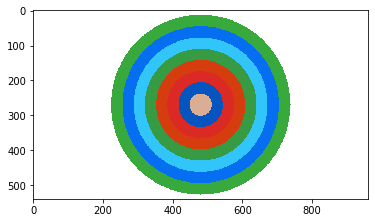

In [2]:
import math

world = World()
world.enable_jupyter_notebook_mode()

width = 1920 // 2
height = 1080 // 2
world.create_an_image(width=width, height=height)

center_x = width // 2
center_y = height // 2

radius = height // 2.1 
parts_number = 8
part_of_radius = radius // parts_number
parts = [part_of_radius*i for i in range(parts_number+1)]
color_list = [world.get_random_color() for i in range(parts_number)]
color = color_list[0]
current_part_number = 0
for y in range(height):
    for x in range(width):
        distance = math.sqrt(math.pow((center_x - x), 2) + math.pow((center_y - y), 2))
        if distance <= radius:
            for i in range(parts_number):
                if (parts[i] <= distance <= parts[i + 1]):
                    color = color_list[i]
            world.draw_a_point(x, y, color)

world.show()
world.save()

## Draw a dynamic circle

In [3]:
import numpy as np
from moviepy.editor import VideoClip

import math
from time import sleep

world = World()
world.enable_jupyter_notebook_mode()

width = 1920 // 4
height = 1080 // 4
world.create_an_image(width=width, height=height)

center_x = width // 2
center_y = height // 2

radius = height // 2.1 
parts_number = 8
part_of_radius = radius // parts_number
parts = [part_of_radius*i for i in range(parts_number+1)]
color_list = [world.get_random_color() for i in range(parts_number)]
color = color_list[0]
current_part_number = 0
default_frames = 8
frames = 0

def make_frame(t):
    global frames
    for y in range(height):
        for x in range(width):
            distance = math.sqrt(math.pow((center_x - x), 2) + math.pow((center_y - y), 2))
            if distance <= radius:
                for i in range(parts_number):
                    if (parts[i] <= distance <= parts[i + 1]):
                        i = i + frames - 8
                        color = color_list[i]
                world.draw_a_point(x, y, color)
    frames = int(t/0.3) % int(parts_number)
    return world.image

world.show_animation(make_frame, duration=parts_number, fps=5, saving_path=None)

t:   0%|          | 0/40 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
